In [1]:
from sklearn.svm import SVC
import numpy as np
import uproot
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#file     = uproot.open('./20230523/laser000010.bin.root')
file     = uproot.open('./20230525/dark_tr100000013.bin.root')
#file     = uproot.open('./20230529/laser_tr60_bl129_1000ns_delay240ns_CFD000025.bin.root')
#file     = uproot.open('./20230530/laser_tr60_bl129_1000ns_delay240ns_CFD000027.bin.root')
#file     = uproot.open('./20230530/laser_tr60_bl129_1000ns_delay240ns_CFD_qdcfilter200ns000028.bin.root')
#file     = uproot.open('./20230530/laser_tr60_bl129_1000ns_delay240ns_CFD_qdcfilter100ns000029.bin.root')


header   = file['header']
tree     = file['tree']

QDC      = tree.arrays(['qdc'], library='numpy')['qdc']
waveform = tree.arrays(['waveform'], library='numpy')['waveform']
timebin_width = header.arrays(['timebin_width'], library='numpy')['timebin_width'] #ns
wave_num = tree.arrays(['wave_num'], library='numpy')['wave_num'][0]
time_array    = np.arange(wave_num) * timebin_width #* ns2us

In [46]:
file_path="./nonafter.txt"
with open(f"{file_path}") as f:
    lines=f.readlines()
    if "," in lines[0]:
        lines=lines[0].split(",")
    elif "\n" in lines:
        pass
    else:
        print(lines)
    nonafter=[int(line) for line in lines]
print(nonafter)

[0, 3, 9, 13, 14, 15, 17, 19, 20, 21, 26, 28, 29, 34, 35, 36, 40, 43, 48, 51, 53, 56, 61, 62, 64, 66, 68, 69, 72, 84, 86, 87, 92, 94, 95, 100, 113, 114, 116, 117, 124, 128, 134, 136, 137, 139, 145, 146, 155, 157, 160, 161, 166, 167, 174, 180, 181, 183, 184, 188, 193, 194]


In [40]:
X=np.zeros(wave_num).reshape(1,200)

for i in range(200):
    X=np.vstack((X,waveform[i]))

X=X[1:]


In [42]:
label=[]
for i in range(200):
    if i in nonafter:
        label.append(0)
    else:
        label.append(1)
y=np.array(label)

In [43]:
# データセットの準備
# Xは特徴ベクトルの行列、yは対応するラベルのベクトルとします
clf = SVC()
clf.fit(X, y)

# 分類するデータの作成
test_data = np.array([waveform[200],waveform[201]])  # 2個の一次元配列

# データの分類
predictions = clf.predict(test_data)

# 分類結果の表示
for i, pred in enumerate(predictions):
    print(f"Test data {i+1} is predicted as class {pred}")

Test data 1 is predicted as class 1
Test data 2 is predicted as class 1


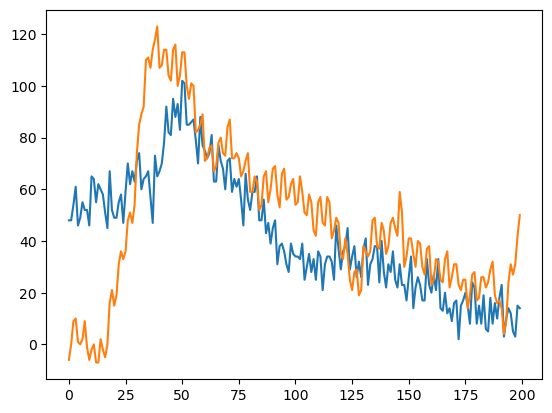

In [44]:
plt.plot(time_array,waveform[200])
plt.plot(time_array,waveform[201])